# ANN Exercise AI-A

## by Maxwell Ernst
### Date started: 2/28/2023

Artificial Neural Networks (ANNs) have shown great potential in image classification tasks. Image classification is the process of assigning a label to an image based on its content. ANNs are a class of machine learning algorithms that are inspired by the structure and function of biological neurons. ANNs consist of several layers of interconnected nodes, or neurons, that process and transform data.

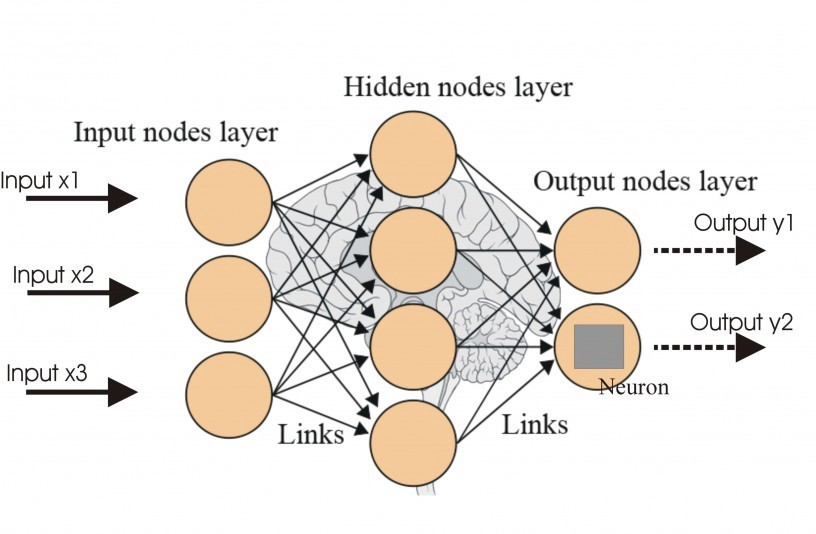

## Exercise :

Description
Construct, train and test an artificial neural network using a dataset of your own choice. Try different settings for two or more hyperparameters and investigate the effect on learning. Write a Jupyter notebook which contains your python code and in which you describe your approach and results. In your notebook, you should describe your dataset and add a reference to the source of your dataset. Also, include references to any source code or tutorials that you used to write your code. If your neural network is aimed at classification, you should create a confusion matrix and discuss the results. Also reflect on the knowledge and skills you acquired on artificial neural networks.

Deliverable
Convert your Jupyter notebook to html and deliver the .html file. 

## Approach :

Learn about ANN by applying a ANN model to the MINST Fashion dataset and tuning the hyperparameters to achieve better performance if possible.

# Libraries

In [43]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


## Data set

The MINST Fashion Data set contains 70 000 greyed out images in 10 categories. At low resolution 28 x 28 pixels.
https://github.com/zalandoresearch/fashion-mnist

Following the tutorial from TensorFlow https://www.tensorflow.org/tutorials/keras/classification#make_predictions.

In [44]:
#IMporting MINST data set of clothes from Tensorflow library

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [45]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Exploring the data set

In [88]:
train_images[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

In [46]:
train_images.shape

(60000, 28, 28)

There are 60 000 images, with the size of 28 x 28 pixels

In [47]:
len(train_labels)

60000

There are also 60 000 labels

In [48]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [49]:
test_images.shape

(10000, 28, 28)

There are 10 000 test images

In [50]:
len(test_labels)

10000

And 10 000 labels for the test imges

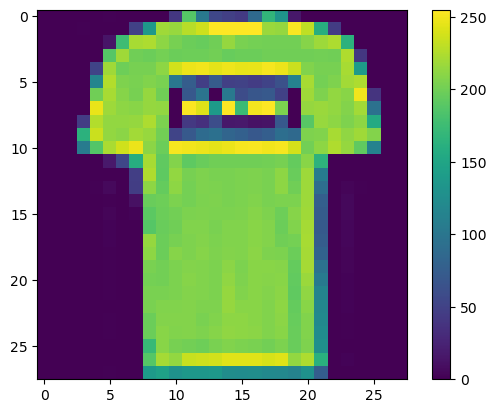

In [51]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

The graph above shows the value of the pixels for the item of clothing.

# Data Handling

Scaling the value of the pixels to between 0 and 1 by diving the value by 255 for the ML model.

In [52]:
train_images = train_images / 255.0

test_images = test_images / 255.0 

In [53]:
train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [54]:
test_images 

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

Showing the train_images

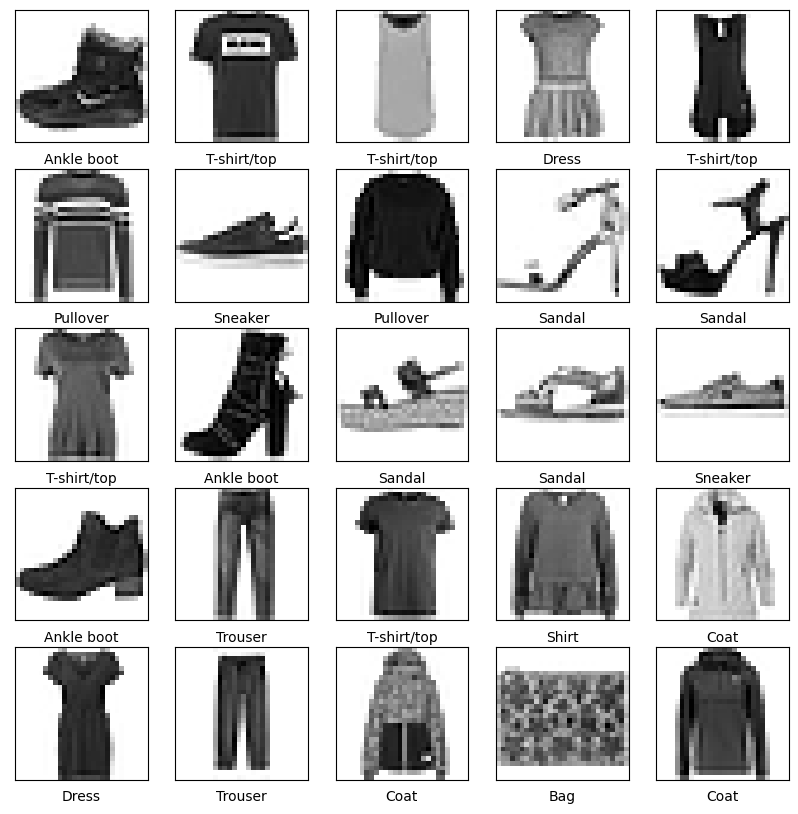

In [55]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Modeling

### Setting up the layers

In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Compiling the model

In [57]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training and feeding the model

In [58]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 948us/step - loss: 0.5037 - accuracy: 0.8240
Epoch 2/10
1875/1875 [==============================] - 2s 960us/step - loss: 0.3781 - accuracy: 0.8635
Epoch 3/10
1875/1875 [==============================] - 2s 945us/step - loss: 0.3396 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 2s 907us/step - loss: 0.3150 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 2s 909us/step - loss: 0.2953 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 2s 925us/step - loss: 0.2817 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 2s 926us/step - loss: 0.2664 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 2s 908us/step - loss: 0.2569 - accuracy: 0.9052
Epoch 9/10
1875/1875 [==============================] - 2s 919us/step - loss: 0.2468 - accuracy: 0.9090
Epoch 10/10
1875/1875 [==============================] - 2s 927u

The model reaches an accuracy of about 0.91. That seems to be a good result.

### Evaluate Accuracy

In [59]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3325 - accuracy: 0.8847 - 225ms/epoch - 719us/step

Test accuracy: 0.8847000002861023


The accuracy on the test data is less than the training data, this can mean that the model is overfitted for the training data. Although it is a slight deviation from the test data, 0.88 is quite a strong accuracy.

# Making predictions

attatching a softmax layer to convert the model's linear outputs

In [60]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [61]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 543us/step


Predicting the label for each image

In [62]:
predictions[0]

array([3.1426673e-08, 1.8254212e-07, 1.5600529e-09, 4.5364186e-07,
       7.1710846e-09, 2.6763661e-04, 5.7406957e-08, 4.8503932e-02,
       1.9495876e-06, 9.5122576e-01], dtype=float32)

the prediction is an array of 10 numbers each number repesenting the models confidence in the predictions for the item of clothing

In [63]:
np.argmax(predictions[0])

9

The highest value is 9 

So the model prediciting the image to be a ankle boot or class_name[9]

In [64]:
test_labels[0]

9

Graphing the prediction next to the image

In [65]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

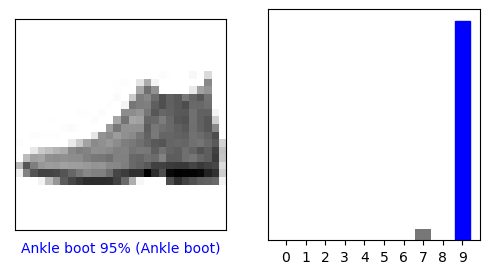

In [66]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

As you can see the sneaker shoe below has a lower accuracy compared to the accuracy of the Ankle Boot above.  Although if the accuracy is as high as 95% or above it can mean the model is overfitted for the training data set. The sandal and sneaker seem to

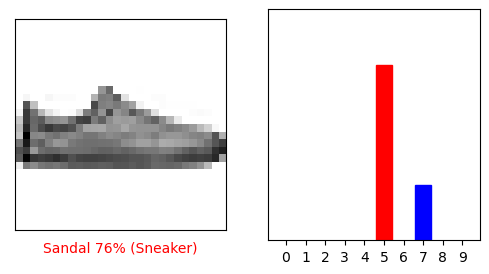

In [67]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

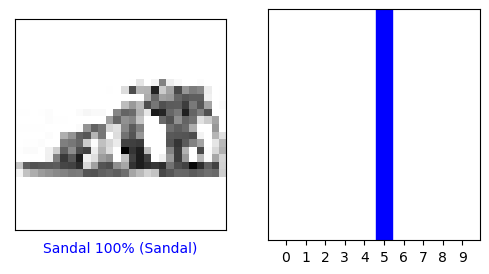

In [68]:
i = 11
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

### All predictions

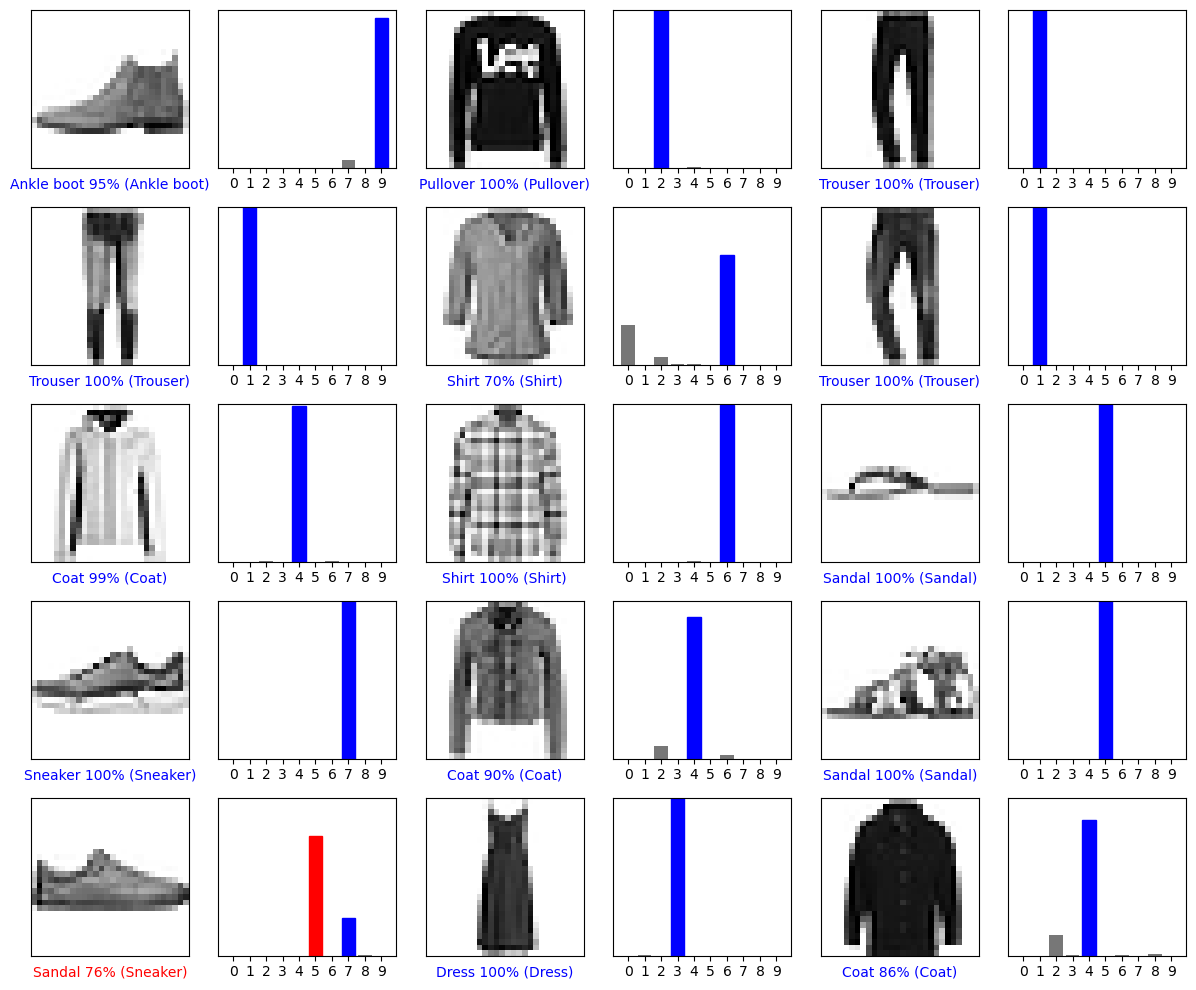

In [69]:

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

The graph above show the predictions for each item of clothing. there are many with 100% as an accuracy, this can mean that the model performed very well. only one of the items of clothing were predicted incorrectly.

# Confusion Matrix

A confusion matrix will be used to evaluate the performance of the model.

In [70]:
i = num_images
predictions[i]

array([1.7369156e-06, 9.9996042e-01, 1.2708976e-08, 1.9810066e-05,
       1.7702185e-05, 2.4386809e-11, 3.0953373e-07, 2.5251357e-15,
       1.2645208e-09, 5.7672315e-11], dtype=float32)

In [71]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [72]:
num_images

15

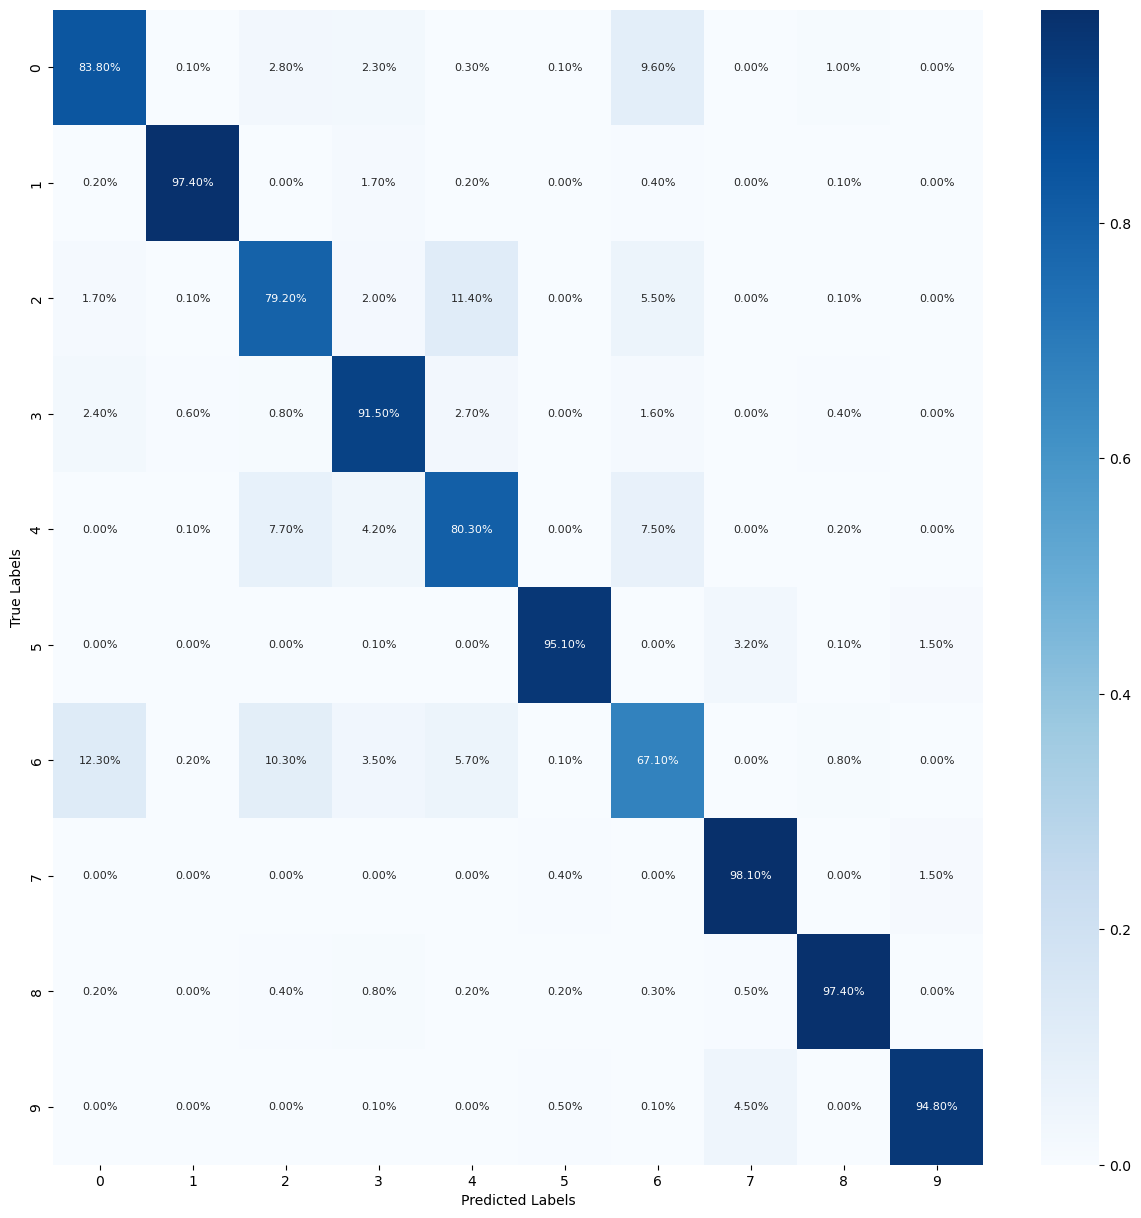

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd


predicted_labels = [tf.argmax(prediction).numpy() for prediction in predictions]


cm = confusion_matrix(test_labels, predicted_labels, normalize='true')


df_cm = pd.DataFrame(cm, index=[i for i in range(10)],
                    columns=[i for i in range(10)])


plt.figure(figsize=(10, 10))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='.2%', annot_kws={"fontsize":8})
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

From the confusion matrix above we can see that there are quite strong correlations between the predicted and actual labels. Only a few with as low as around 67% and as high as 98%.

### Predicting a single image

Using the trained model

In [74]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [75]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [76]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 12ms/step
[[3.50347509e-05 4.57135545e-12 9.99174893e-01 2.40396895e-12
  6.88844011e-04 1.49797756e-08 1.01224454e-04 1.49255684e-18
  1.66817760e-09 7.08875203e-16]]


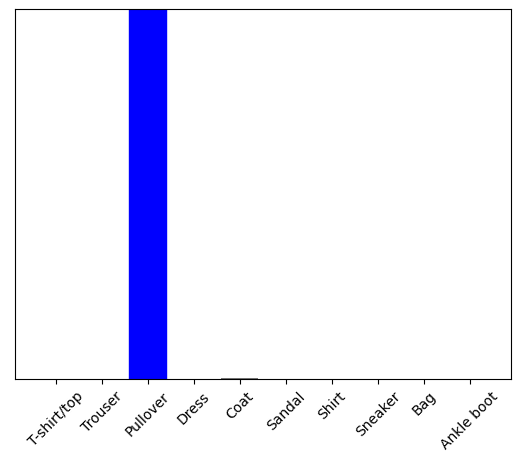

In [77]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

The model was able to predict the Pullover with a very high accuracy score.

### Hyper Paramater tuning

To see if its is possible improve the model using the Keras model tuner which will help find some hyperparameters.

Test and training data

In [78]:
import keras
(img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()

In [79]:
# Normalize pixel values between 0 and 1
img_train = img_train.astype('float32') / 255.0
img_test = img_test.astype('float32') / 255.0

Defining the model

In [80]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

Using Keras Tuner

In [81]:
import tensorflow as tf
from tensorflow import keras 
import keras_tuner as kt


The Keras Tuner has four tuners available - RandomSearch, Hyperband, BayesianOptimization, and Sklearn. Below Hyperband is used.

In [82]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

INFO:tensorflow:Reloading Tuner from my_dir\intro_to_kt\tuner0.json


Creating a call back point

In [83]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [84]:
tuner.search(img_train, label_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 512 and the optimal learning rate for the optimizer
is 0.001.



The results show some optimal hyperparameters. With the number of units in  the first densley-connected layer and the best learning rate accouring to the Keras tuner.

### Training the model with new parameters

In [85]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(img_train, label_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4929 - accuracy: 0.8249 - val_loss: 0.3885 - val_accuracy: 0.8584
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3669 - accuracy: 0.8654 - val_loss: 0.3619 - val_accuracy: 0.8708
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3283 - accuracy: 0.8795 - val_loss: 0.3566 - val_accuracy: 0.8677
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3039 - accuracy: 0.8865 - val_loss: 0.3331 - val_accuracy: 0.8846
Epoch 5/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2865 - accuracy: 0.8934 - val_loss: 0.3193 - val_accuracy: 0.8839
Epoch 6/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2686 - accuracy: 0.9001 - val_loss: 0.3343 - val_accuracy: 0.8827
Epoch 7/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2574 - accuracy: 0.9040 - val_loss: 0.3256 - val_accuracy:

In [86]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(img_train, label_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/23
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4874 - accuracy: 0.8284 - val_loss: 0.4799 - val_accuracy: 0.8279
Epoch 2/23
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3697 - accuracy: 0.8637 - val_loss: 0.3503 - val_accuracy: 0.8766
Epoch 3/23
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3292 - accuracy: 0.8796 - val_loss: 0.3485 - val_accuracy: 0.8769
Epoch 4/23
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3050 - accuracy: 0.8873 - val_loss: 0.3257 - val_accuracy: 0.8833
Epoch 5/23
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2855 - accuracy: 0.8934 - val_loss: 0.3477 - val_accuracy: 0.8727
Epoch 6/23
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2700 - accuracy: 0.8985 - val_loss: 0.3225 - val_accuracy: 0.8849
Epoch 7/23
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2564 - accuracy: 0.9025 - val_loss: 0.3170 - val_accuracy:

Evaluating the model results

In [87]:
eval_result = hypermodel.evaluate(img_test, label_test)
print("[test loss, test accuracy]:", eval_result)

313/313 [==============================] - 0s 797us/step - loss: 0.4209 - accuracy: 0.8852
[test loss, test accuracy]: [0.42085760831832886, 0.885200023651123]


- (first iteration) 313/313 - 0s - loss: *0.3235* - accuracy: *0.8840* - 237ms/epoch - 756us/step 
- (second iteration) 313/313 - 0s 753us/step - loss: *0.4301* - accuracy: *0.8820* 

The results show a slight decrease in performance compared to the previous version. The result of the tuned model was 0.88. Therefore, the tuning did not make much of an improvemnent.

## Conclusion

 I was able to perform the AI working methodology and apply ANN to the MINST dataset. The model was tuned to get a better accuracy but the results were not as good as the original ANN model, with a slight decrease in accuracy. Overall, I followed the exercise and it proved to be quite insightful. Being able to follow the tutorial and try some things of my own worked out well for me. Since it was difficult to find a starting point. I was able to gain more knowledge about ANN, parameter tuning, and more.